In [1]:
import convml_tt.data.sources.sampling.triplets as triplet_sampling
from regridcart import LocalCartesianDomain, CartesianDomain

import cartopy.crs as ccrs
import xarray as xr

%matplotlib inline

# Locally Cartesian Domain

array([[-150000.,   50000.],
       [ 150000.,   50000.],
       [ 150000.,  -50000.],
       [-150000.,  -50000.]])

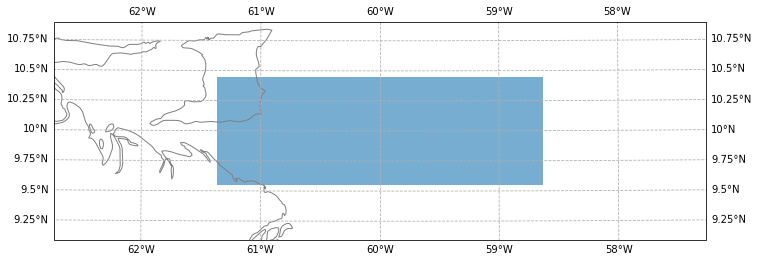

In [2]:
domain = LocalCartesianDomain(
    central_latitude=10, central_longitude=-60, l_zonal=300e3, l_meridional=100e3
)

ax = domain.plot_outline()

domain.spatial_bounds

LocalCartesianSquareTileDomain(x_c=0, y_c=0, l_zonal=200000, l_meridional=200000, central_latitude=15.4769, central_longitude=-44.7191)


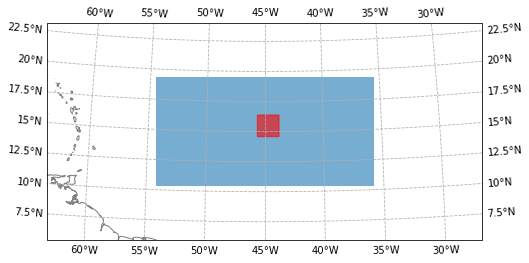

In [3]:
domain = LocalCartesianDomain(
    central_latitude=15, central_longitude=-45, l_zonal=2000e3, l_meridional=1000e3
)

ax = domain.plot_outline()

tile = triplet_sampling.generate_randomly_located_tile(domain=domain, tile_size=200e3)
tile.x_c = tile.y_c = 0.0
tile.plot_outline(ax=ax, color="red")

tile.central_longitude, tile.central_latitude, domain.central_longitude
print(tile)

In [4]:
tile.central_latitude

15.476944188015768

LocalCartesianDomain(x_c=0, y_c=0, l_zonal=3e+06, l_meridional=1e+06, central_latitude=15, central_longitude=-45)
LocalCartesianSquareTileDomain(x_c=17314, y_c=-183038, l_zonal=200000, l_meridional=200000, central_latitude=16.6541, central_longitude=-45.1623)
LocalCartesianSquareTileDomain(x_c=97096.6, y_c=359.919, l_zonal=200000, l_meridional=200000, central_latitude=14.9954, central_longitude=-45.904)
LocalCartesianSquareTileDomain(x_c=-1.27041e+06, y_c=-61841, l_zonal=200000, l_meridional=200000, central_latitude=15.2511, central_longitude=-33.1485)


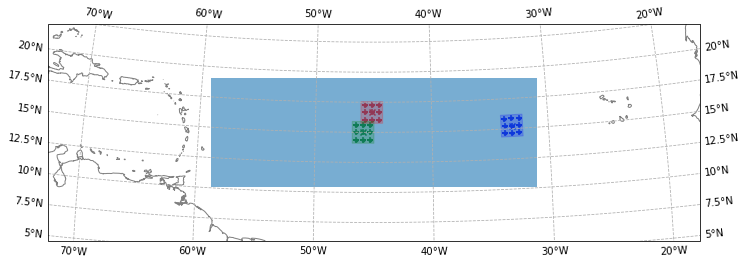

In [5]:
domain = LocalCartesianDomain(
    central_latitude=15, central_longitude=-45, l_zonal=3000e3, l_meridional=1000e3
)

ax = domain.plot_outline()

triplet_tiles = triplet_sampling.generate_triplet_location(domain=domain, tile_size=200e3)
print(domain)

for tile, color in zip(triplet_tiles, "rgb"):
    tile.plot_outline(ax=ax, color=color, alpha=0.2)
    print(tile)
    
    da_grid = tile.get_grid(N=3)
    ax.scatter(da_grid.lon, da_grid.lat, marker='.', transform=ccrs.PlateCarree(), color=color)
    ax.scatter(*xr.broadcast(da_grid.x, da_grid.y), marker='+', transform=da_grid.crs, color=color)
    
    ax.scatter(tile.central_longitude, tile.central_latitude, marker='x', transform=ccrs.PlateCarree(), color=color)
    
    #print(da_grid)
    
#ax.set_global()

In [6]:
print(domain)

LocalCartesianDomain(x_c=0, y_c=0, l_zonal=3e+06, l_meridional=1e+06, central_latitude=15, central_longitude=-45)


In [7]:
print(tile)

LocalCartesianSquareTileDomain(x_c=-1.27041e+06, y_c=-61841, l_zonal=200000, l_meridional=200000, central_latitude=15.2511, central_longitude=-33.1485)


In [8]:
domain.spatial_bounds_geometry.contains(tile.spatial_bounds_geometry)

True

LocalCartesianSquareTileDomain(x_c=-1.27041e+06, y_c=-61841, l_zonal=200000, l_meridional=200000, central_latitude=15.2511, central_longitude=-33.1485)


array([[-34.08347368,  16.1528876 ,   0.        ],
       [-32.21353596,  16.1528876 ,   0.        ],
       [-32.22147724,  14.34545948,   0.        ],
       [-34.0755324 ,  14.34545948,   0.        ]])

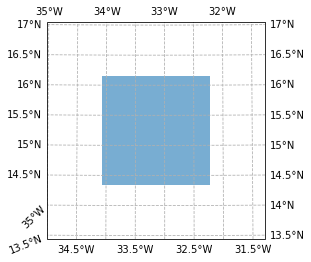

In [9]:
tile.plot_outline()
print(tile)
tile.latlon_bounds

In [10]:
domain.spatial_bounds

array([[-1500000.,   500000.],
       [ 1500000.,   500000.],
       [ 1500000.,  -500000.],
       [-1500000.,  -500000.]])

In [11]:
tile.spatial_bounds

array([[-1370410.04050017,    38159.02684463],
       [-1170410.04050017,    38159.02684463],
       [-1170410.04050017,  -161840.97315537],
       [-1370410.04050017,  -161840.97315537]])

In [12]:
triplet_tiles[1].get_grid(N=3)

<xarray.Dataset>
Dimensions:  (x: 3, y: 3)
Coordinates:
  * x        (x) float64 -6.667e+04 1.455e-11 6.667e+04
  * y        (y) float64 -6.667e+04 1.455e-11 6.667e+04
Data variables:
    lon      (x, y) float64 -46.52 -46.52 -46.53 -45.9 ... -45.29 -45.28 -45.28
    lat      (x, y) float64 14.39 14.99 15.6 14.39 15.0 15.6 14.39 14.99 15.6
Attributes:
    crs:      <cartopy.crs.LambertAzimuthalEqualArea object at 0x7fa580929110>

# Rectangular domain

array([[-150000.,   50000.],
       [ 150000.,   50000.],
       [ 150000.,  -50000.],
       [-150000.,  -50000.]])

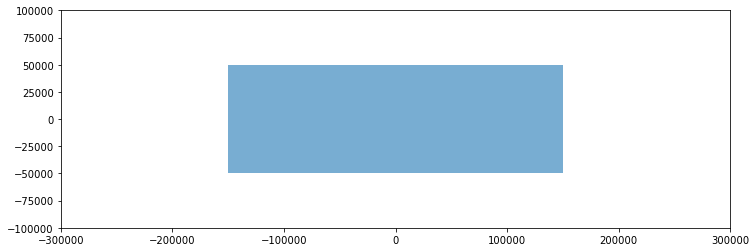

In [13]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)

ax = domain.plot_outline()

domain.spatial_bounds

(110692.52303360286, 28853.143063451455)

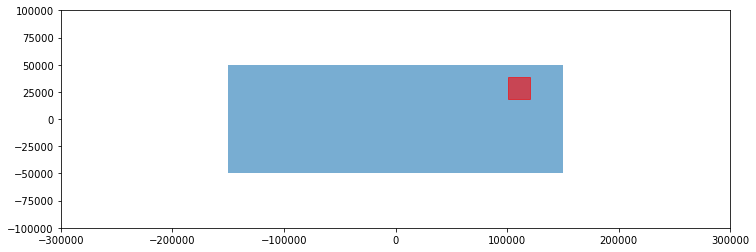

In [14]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)

ax = domain.plot_outline()

tile = triplet_sampling.generate_randomly_located_tile(domain=domain, tile_size=20e3)
tile.plot_outline(ax=ax, color="red")
tile.x_c, tile.y_c

<xarray.Dataset>
Dimensions:  (x: 3, y: 3)
Coordinates:
  * x        (x) float64 1.256e+05 1.323e+05 1.389e+05
  * y        (y) float64 -3.333e+04 -2.666e+04 -1.999e+04
Data variables:
    *empty*


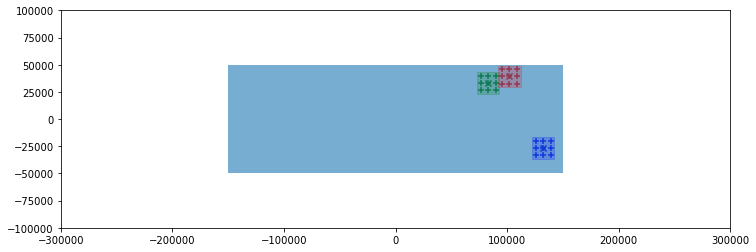

In [15]:
domain = CartesianDomain(l_zonal=300e3, l_meridional=100e3)


ax = domain.plot_outline()

triplet_tiles = triplet_sampling.generate_triplet_location(domain=domain, tile_size=20e3)

for tile, color in zip(triplet_tiles, "rgb"):
    tile.plot_outline(ax=ax, color=color, alpha=0.2)
    
    da_grid = tile.get_grid(N=3)
    ax.scatter(*xr.broadcast(da_grid.x, da_grid.y), marker='+', color=color)
    ax.scatter(tile.x_c, tile.y_c, marker='x', color=color)
    
print(da_grid)

In [16]:
tile.spatial_bounds

array([[122282.14267689, -16660.75872005],
       [142282.14267689, -16660.75872005],
       [142282.14267689, -36660.75872005],
       [122282.14267689, -36660.75872005]])

In [17]:
domain.spatial_bounds

array([[-150000.,   50000.],
       [ 150000.,   50000.],
       [ 150000.,  -50000.],
       [-150000.,  -50000.]])

In [18]:
tile.get_grid(N=100)

<xarray.Dataset>
Dimensions:  (x: 100, y: 100)
Coordinates:
  * x        (x) float64 1.224e+05 1.226e+05 1.228e+05 ... 1.42e+05 1.422e+05
  * y        (y) float64 -3.656e+04 -3.636e+04 ... -1.696e+04 -1.676e+04
Data variables:
    *empty*

In [19]:
print(tile)

CartesianSquareTileDomain(x_c=132282, y_c=-26660.8, l_zonal=20000, l_meridional=20000)


In [20]:
print(domain)

CartesianDomain(x_c=0, y_c=0, l_zonal=300000, l_meridional=100000)
